In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.io as sio

## Load data

         X1        X2
0  1.842080  4.607572
1  5.658583  4.799964
2  6.352579  3.290854
3  2.904017  4.612204
4  3.231979  4.939894


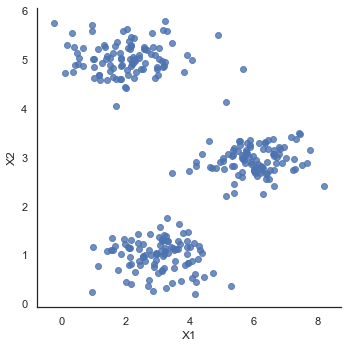

In [3]:
mat = sio.loadmat('data_/ex7data2.mat')
data2 = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
print(data2.head())

sns.set(context="notebook", style="white")
sns.lmplot('X1', 'X2', data=data2, fit_reg=False)
plt.show()

## Random init

In [25]:
def random_init(data, k):
    return data.sample(k).to_numpy()

In [26]:
random_init(data2, 3)

array([[4.1590816 , 0.61720733],
       [1.65456309, 1.18631175],
       [5.6673103 , 2.96477867]])